In [7]:
from League import *
from model import *
from tqdm import tqdm
import pandas as pd

learning_games_per_iteration = 100
eval_games_per_iteration = 100
n_rounds = 30
warmup_games = 10
warmup = False
random_train = False
games_per_step = 2
effective_win_rate = True
verbose = False

# Group A

100%|██████████| 10/10 [00:01<00:00,  6.20it/s]


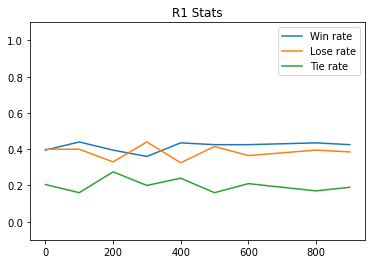

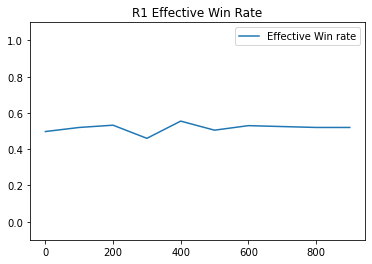

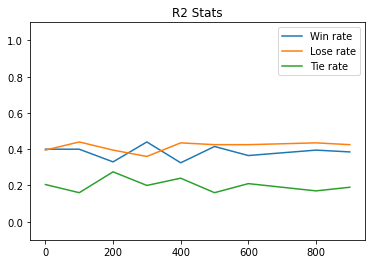

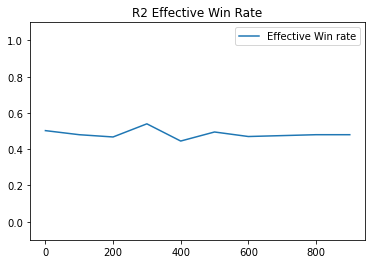

  name  effective win rate
0   R1              0.5165
1   R2              0.4835


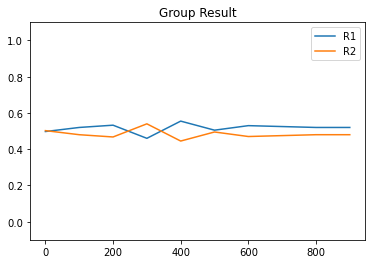

Player: R1
[[0.395, 0.44, 0.395, 0.36, 0.435, 0.425, 0.425, 0.43, 0.435, 0.425], [0.4, 0.4, 0.33, 0.44, 0.325, 0.415, 0.365, 0.38, 0.395, 0.385], [0.205, 0.16, 0.275, 0.2, 0.24, 0.16, 0.21, 0.19, 0.17, 0.19]]
Player: R2
[[0.4, 0.4, 0.33, 0.44, 0.325, 0.415, 0.365, 0.38, 0.395, 0.385], [0.395, 0.44, 0.395, 0.36, 0.435, 0.425, 0.425, 0.43, 0.435, 0.425], [0.205, 0.16, 0.275, 0.2, 0.24, 0.16, 0.21, 0.19, 0.17, 0.19]]


In [31]:
player_list = [
    DeepQPlayer("Four Layer", model_cls=Model2), 
    RandomQPlayer("Random"), 
    QPlayer("Q Learner", memory_type='lru', capacity=100000),
    DeepQPlayer("Linear", model_cls=LinearModel),
]

# player_list = [
#     RandomQPlayer("R1"), 
#     RandomQPlayer("R2"), 
# ]

league = League(player_list, learning_games_per_round=learning_games_per_iteration, games_per_round=eval_games_per_iteration, warm_up=warmup_games)

# NOTE: can use this for warm up
if warmup:
    league.warmup()

n_players = len(player_list)

# {name: [[round_1_win, ...]
#         [round_1_lose, ...] 
#         [round_1_tie, ...]], ...}
plot_stats = {}

# play rounds of games
for i in tqdm(range(n_rounds)):
    round_results = league.play_round(random_train=random_train, games_per_step=games_per_step)
    for match_up in round_results['stats'].keys():
        names = round_results['matchups'][match_up].split(' vs ')
        p1_name = names[0]
        p2_name = names[1]

        # Player 1 stats
        wins = round_results['stats'][match_up][1]
        lose = round_results['stats'][match_up][2]
        tie = round_results['stats'][match_up][0]
        # if not there
        if p1_name not in plot_stats:
            plot_stats[p1_name] = [[wins],[lose],[tie]]
        # if there
        else:
            # if round stats already initialized
            if len(plot_stats[p1_name][0]) == i+1:
                plot_stats[p1_name][0][i] += wins
                plot_stats[p1_name][1][i] += lose
                plot_stats[p1_name][2][i] += tie
            # if round not initialized start column
            else:
                plot_stats[p1_name][0].append(wins)
                plot_stats[p1_name][1].append(lose)
                plot_stats[p1_name][2].append(tie)                    

        # Player 2 stats
        wins = round_results['stats'][match_up][2]
        lose = round_results['stats'][match_up][1]
        tie = round_results['stats'][match_up][0]
        # if not there
        if p2_name not in plot_stats:
            plot_stats[p2_name] = [[wins],[lose],[tie]]
        # if there
        else:
            # if round stats already initialized
            if len(plot_stats[p2_name][0]) == i+1:
                plot_stats[p2_name][0][i] += wins
                plot_stats[p2_name][1][i] += lose
                plot_stats[p2_name][2][i] += tie
            # if round not initialized start column
            else:
                plot_stats[p2_name][0].append(wins)
                plot_stats[p2_name][1].append(lose)
                plot_stats[p2_name][2].append(tie)

if verbose:
    print("\n", plot_stats)

all_ewr = []
for player in plot_stats.keys():
    games = np.arange(0, (n_rounds)*eval_games_per_iteration, eval_games_per_iteration)
    e_w_r = []

    for i in range(n_rounds):
        # for effective win rate plot
        if effective_win_rate:
            e_w_r.append((plot_stats[player][0][i] + plot_stats[player][2][i]*0.5)/(eval_games_per_iteration*((n_players-1)*2)))

        plot_stats[player][0][i] /= eval_games_per_iteration*((n_players-1)*2)
        plot_stats[player][1][i] /= eval_games_per_iteration*((n_players-1)*2)
        plot_stats[player][2][i] /= eval_games_per_iteration*((n_players-1)*2)

    all_ewr.append(e_w_r)
    p1_plot = plt.plot(games, plot_stats[player][0], label="Win rate")
    p2_plot = plt.plot(games, plot_stats[player][1], label="Lose rate")
    tie_plot = plt.plot(games, plot_stats[player][2], label="Tie rate")
    plt.ylim(-0.1,1.1)
    plt.title("{} Stats".format(player))
    plt.legend()
    plt.show()

    # for effective win rate plot
    if effective_win_rate:
        e_w_r_plot = plt.plot(games, e_w_r, label="Effective Win rate")
        plt.ylim(-0.1,1.1)
        plt.title("{} Effective Win Rate".format(player))
        plt.legend()
        plt.show()

group_result = pd.DataFrame()
player_names = list(plot_stats.keys())
group_result['name'] = player_names
group_result['effective win rate'] = [np.mean(_) for _ in all_ewr]
group_result.sort_values('effective win rate', ascending=False, inplace=True)
print(group_result)
for i, wr in enumerate(all_ewr):
#     print(player_names[i], ':', np.mean(wr))
    plt.plot(games, wr, label=player_names[i])
plt.ylim(-0.1,1.1)
plt.title('Group Result')
plt.legend()
plt.show()
        
if verbose:
    print("\n", plot_stats)

for _round in plot_stats.keys():
    print("Player: {}".format(_round))
    print(plot_stats[_round])


# Group B

In [ ]:
player1 = DeepQPlayer("Four Layer", model_cls=Model2)
player2 = DeepQPlayer("Two Layer", model_cls=TwoLayerNN)
player3 = DeepQPlayer("Three Layer", model_cls=ThreeLayerNN) 
player4 = DeepQPlayer("Five Layer", model_cls=FiveLayerNN)
player_list = [
        player1, player2, player3, player4
]


league = League(player_list, learning_games_per_round=learning_games_per_iteration, games_per_round=eval_games_per_iteration, warm_up=warmup_games)

# NOTE: can use this for warm up
if warmup:
    league.warmup()

n_players = len(player_list)

# {name: [[round_1_win, ...]
#         [round_1_lose, ...] 
#         [round_1_tie, ...]], ...}
plot_stats = {}

# play rounds of games
for i in tqdm(range(n_rounds)):
    round_results = league.play_round(random_train=random_train, games_per_step=games_per_step)
    for match_up in round_results['stats'].keys():
        names = round_results['matchups'][match_up].split(' vs ')
        p1_name = names[0]
        p2_name = names[1]

        # Player 1 stats
        wins = round_results['stats'][match_up][1]
        lose = round_results['stats'][match_up][2]
        tie = round_results['stats'][match_up][0]
        # if not there
        if p1_name not in plot_stats:
            plot_stats[p1_name] = [[wins],[lose],[tie]]
        # if there
        else:
            # if round stats already initialized
            if len(plot_stats[p1_name][0]) == i+1:
                plot_stats[p1_name][0][i] += wins
                plot_stats[p1_name][1][i] += lose
                plot_stats[p1_name][2][i] += tie
            # if round not initialized start column
            else:
                plot_stats[p1_name][0].append(wins)
                plot_stats[p1_name][1].append(lose)
                plot_stats[p1_name][2].append(tie)                    

        # Player 2 stats
        wins = round_results['stats'][match_up][2]
        lose = round_results['stats'][match_up][1]
        tie = round_results['stats'][match_up][0]
        # if not there
        if p2_name not in plot_stats:
            plot_stats[p2_name] = [[wins],[lose],[tie]]
        # if there
        else:
            # if round stats already initialized
            if len(plot_stats[p2_name][0]) == i+1:
                plot_stats[p2_name][0][i] += wins
                plot_stats[p2_name][1][i] += lose
                plot_stats[p2_name][2][i] += tie
            # if round not initialized start column
            else:
                plot_stats[p2_name][0].append(wins)
                plot_stats[p2_name][1].append(lose)
                plot_stats[p2_name][2].append(tie)

if verbose:
    print("\n", plot_stats)

all_ewr = []
for player in plot_stats.keys():
    games = np.arange(0, (n_rounds)*eval_games_per_iteration, eval_games_per_iteration)
    e_w_r = []

    for i in range(n_rounds):
        # for effective win rate plot
        if effective_win_rate:
            e_w_r.append((plot_stats[player][0][i] + plot_stats[player][2][i]*0.5)/(eval_games_per_iteration*((n_players-1)*2)))

        plot_stats[player][0][i] /= eval_games_per_iteration*((n_players-1)*2)
        plot_stats[player][1][i] /= eval_games_per_iteration*((n_players-1)*2)
        plot_stats[player][2][i] /= eval_games_per_iteration*((n_players-1)*2)

    all_ewr.append(e_w_r)
    p1_plot = plt.plot(games, plot_stats[player][0], label="Win rate")
    p2_plot = plt.plot(games, plot_stats[player][1], label="Lose rate")
    tie_plot = plt.plot(games, plot_stats[player][2], label="Tie rate")
    plt.ylim(-0.1,1.1)
    plt.title("{} Stats".format(player))
    plt.legend()
    plt.show()

    # for effective win rate plot
    if effective_win_rate:
        e_w_r_plot = plt.plot(games, e_w_r, label="Effective Win rate")
        plt.ylim(-0.1,1.1)
        plt.title("{} Effective Win Rate".format(player))
        plt.legend()
        plt.show()

group_result = pd.DataFrame()
player_names = list(plot_stats.keys())
group_result['name'] = player_names
group_result['effective win rate'] = [np.mean(_) for _ in all_ewr]
group_result.sort_values('effective win rate', ascending=False, inplace=True)
print(group_result)
for i, wr in enumerate(all_ewr):
#     print(player_names[i], ':', np.mean(wr))
    plt.plot(games, wr, label=player_names[i])
plt.ylim(-0.1,1.1)
plt.title('Group Result')
plt.legend()
plt.show()
        
if verbose:
    print("\n", plot_stats)

for _round in plot_stats.keys():
    print("Player: {}".format(_round))
    print(plot_stats[_round])


 60%|██████    | 18/30 [1:24:59<58:11, 290.95s/it]  

In [ ]:
torch.save(player1, "B4_group.pth")
torch.save(player2, "B2_group.pth")
torch.save(player3, "B3_group.pth")
torch.save(player4, "B5_group.pth")
